In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib
import matplotlib as mpl
importlib.reload(MA)

plt.rcParams.update({
    "font.size": 16,        # Base font size
    "axes.titlesize": 18,   # Title font size
    "axes.labelsize": 16,   # Axis label size
    "xtick.labelsize": 14,  # X tick labels
    "ytick.labelsize": 14,  # Y tick labels
    "legend.fontsize": 10,  # Legend font
    "figure.titlesize": 20  # Figure title
})

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 150  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

In [24]:
# Potential
def x_potential(x):
    return 1 / 2 * x ** 2


def y_potential(x):
    return 1000 * x ** 4


def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)


def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values) / y_errors
    return residuals

In [35]:
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

paths_orig = paths_x.copy()

Thermalizing...


Thermalising:  29%|██▉       | 145/500 [00:00<00:00, 750.63it/s]

Endpoint acceptance ≈ 0.521
Endpoint acceptance ≈ 0.515


Thermalising:  69%|██████▉   | 347/500 [00:00<00:00, 753.47it/s]

Endpoint acceptance ≈ 0.521
Endpoint acceptance ≈ 0.522


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 735.27it/s]


Endpoint acceptance ≈ 0.528

Sampling...


Sampling:   1%|          | 46/5000 [00:00<00:06, 711.19it/s]

Endpoint acceptance ≈ 0.537


Sampling:   3%|▎         | 146/5000 [00:00<00:06, 695.73it/s]

Endpoint acceptance ≈ 0.532


Sampling:   5%|▍         | 240/5000 [00:00<00:07, 674.73it/s]

Endpoint acceptance ≈ 0.540


Sampling:   7%|▋         | 337/5000 [00:00<00:06, 675.06it/s]

Endpoint acceptance ≈ 0.526


Sampling:   9%|▊         | 436/5000 [00:00<00:06, 694.92it/s]

Endpoint acceptance ≈ 0.550


Sampling:  11%|█         | 538/5000 [00:00<00:05, 784.26it/s]

Endpoint acceptance ≈ 0.525


Sampling:  13%|█▎        | 644/5000 [00:00<00:06, 698.41it/s]

Endpoint acceptance ≈ 0.521


Sampling:  15%|█▍        | 740/5000 [00:01<00:06, 696.53it/s]

Endpoint acceptance ≈ 0.499


Sampling:  17%|█▋        | 839/5000 [00:01<00:06, 684.79it/s]

Endpoint acceptance ≈ 0.518


Sampling:  19%|█▊        | 937/5000 [00:01<00:05, 717.95it/s]

Endpoint acceptance ≈ 0.493


Sampling:  21%|██        | 1037/5000 [00:01<00:05, 691.00it/s]

Endpoint acceptance ≈ 0.550


Sampling:  23%|██▎       | 1137/5000 [00:01<00:05, 698.56it/s]

Endpoint acceptance ≈ 0.522


Sampling:  25%|██▍       | 1238/5000 [00:01<00:05, 752.38it/s]

Endpoint acceptance ≈ 0.529


Sampling:  27%|██▋       | 1341/5000 [00:01<00:04, 749.33it/s]

Endpoint acceptance ≈ 0.531


Sampling:  29%|██▉       | 1444/5000 [00:02<00:04, 716.11it/s]

Endpoint acceptance ≈ 0.517


Sampling:  31%|███       | 1547/5000 [00:02<00:04, 700.67it/s]

Endpoint acceptance ≈ 0.519


Sampling:  33%|███▎      | 1645/5000 [00:02<00:04, 746.32it/s]

Endpoint acceptance ≈ 0.547


Sampling:  35%|███▍      | 1749/5000 [00:02<00:04, 682.50it/s]

Endpoint acceptance ≈ 0.528


Sampling:  37%|███▋      | 1849/5000 [00:02<00:04, 769.59it/s]

Endpoint acceptance ≈ 0.521


Sampling:  39%|███▉      | 1943/5000 [00:02<00:04, 720.56it/s]

Endpoint acceptance ≈ 0.536


Sampling:  41%|████      | 2044/5000 [00:02<00:03, 766.53it/s]

Endpoint acceptance ≈ 0.547


Sampling:  43%|████▎     | 2140/5000 [00:03<00:04, 589.80it/s]

Endpoint acceptance ≈ 0.534


Sampling:  45%|████▍     | 2238/5000 [00:03<00:03, 736.30it/s]

Endpoint acceptance ≈ 0.488


Sampling:  47%|████▋     | 2345/5000 [00:03<00:04, 604.25it/s]

Endpoint acceptance ≈ 0.557


Sampling:  49%|████▉     | 2444/5000 [00:03<00:03, 715.51it/s]

Endpoint acceptance ≈ 0.504


Sampling:  51%|█████     | 2539/5000 [00:03<00:03, 690.41it/s]

Endpoint acceptance ≈ 0.522


Sampling:  53%|█████▎    | 2638/5000 [00:03<00:03, 756.48it/s]

Endpoint acceptance ≈ 0.509


Sampling:  55%|█████▍    | 2743/5000 [00:03<00:02, 771.60it/s]

Endpoint acceptance ≈ 0.549


Sampling:  57%|█████▋    | 2842/5000 [00:04<00:03, 697.34it/s]

Endpoint acceptance ≈ 0.521


Sampling:  59%|█████▉    | 2938/5000 [00:04<00:02, 708.34it/s]

Endpoint acceptance ≈ 0.504


Sampling:  61%|██████    | 3038/5000 [00:04<00:02, 699.22it/s]

Endpoint acceptance ≈ 0.544


Sampling:  63%|██████▎   | 3137/5000 [00:04<00:02, 701.29it/s]

Endpoint acceptance ≈ 0.536


Sampling:  65%|██████▍   | 3236/5000 [00:04<00:02, 694.83it/s]

Endpoint acceptance ≈ 0.511


Sampling:  67%|██████▋   | 3339/5000 [00:04<00:02, 761.85it/s]

Endpoint acceptance ≈ 0.507


Sampling:  69%|██████▉   | 3443/5000 [00:04<00:02, 636.87it/s]

Endpoint acceptance ≈ 0.542


Sampling:  71%|███████   | 3538/5000 [00:05<00:02, 708.41it/s]

Endpoint acceptance ≈ 0.533


Sampling:  73%|███████▎  | 3639/5000 [00:05<00:01, 682.04it/s]

Endpoint acceptance ≈ 0.510


Sampling:  75%|███████▍  | 3730/5000 [00:05<00:01, 681.22it/s]

Endpoint acceptance ≈ 0.521


Sampling:  77%|███████▋  | 3832/5000 [00:05<00:01, 700.61it/s]

Endpoint acceptance ≈ 0.552


Sampling:  79%|███████▊  | 3931/5000 [00:05<00:01, 627.59it/s]

Endpoint acceptance ≈ 0.544


Sampling:  81%|████████  | 4034/5000 [00:05<00:01, 728.68it/s]

Endpoint acceptance ≈ 0.533


Sampling:  83%|████████▎ | 4145/5000 [00:05<00:01, 765.76it/s]

Endpoint acceptance ≈ 0.525


Sampling:  85%|████████▍ | 4246/5000 [00:06<00:01, 703.85it/s]

Endpoint acceptance ≈ 0.533


Sampling:  87%|████████▋ | 4346/5000 [00:06<00:00, 742.17it/s]

Endpoint acceptance ≈ 0.535


Sampling:  89%|████████▉ | 4444/5000 [00:06<00:00, 680.51it/s]

Endpoint acceptance ≈ 0.513


Sampling:  91%|█████████ | 4538/5000 [00:06<00:00, 724.76it/s]

Endpoint acceptance ≈ 0.535


Sampling:  93%|█████████▎| 4637/5000 [00:06<00:00, 649.00it/s]

Endpoint acceptance ≈ 0.514


Sampling:  95%|█████████▍| 4737/5000 [00:06<00:00, 689.24it/s]

Endpoint acceptance ≈ 0.521


Sampling:  97%|█████████▋| 4845/5000 [00:06<00:00, 785.38it/s]

Endpoint acceptance ≈ 0.542


Sampling:  99%|█████████▉| 4946/5000 [00:07<00:00, 729.27it/s]

Endpoint acceptance ≈ 0.513


Sampling: 100%|██████████| 5000/5000 [00:07<00:00, 696.65it/s]



------ Results ------
Numerical PDF area: 1.00000
Analytic PDF area: 1.00000
Standard deviation: 0.7063 (expected ≈ 0.707)
Root mean square: 0.7064 (expected ≈ 0.707)


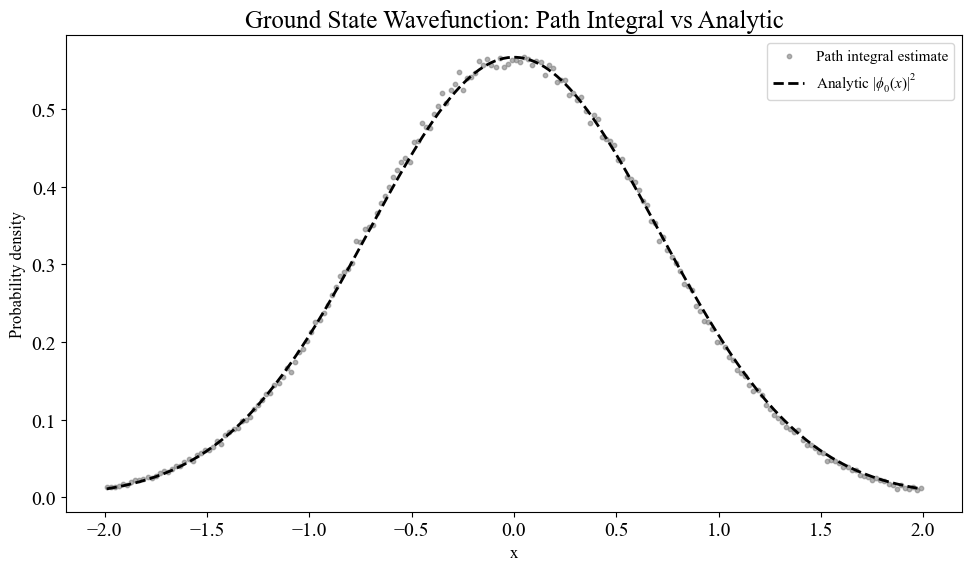

In [36]:
C = 1.8437008005694266
mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x**2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color = 'grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black',linestyle = '--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.tight_layout()
plt.show()

# Paths Plot

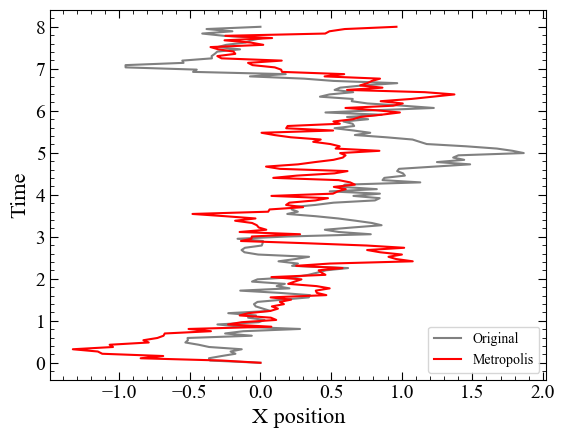

In [37]:
pc_savepath_paths_fig = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Paths.svg"
laptop_savepath_paths_fig = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\Paths.svg"
plt.figure(1)

plt.plot(paths_orig[3],times, color = 'grey', label = "Original")
plt.plot(paths_x[3],times, color = 'red',label = "Metropolis")

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.xlabel('X position')
plt.ylabel('Time')
plt.legend(loc = "lower right")


plt.savefig(pc_savepath_paths_fig, bbox_inches='tight')

plt.show()

# Action Plot

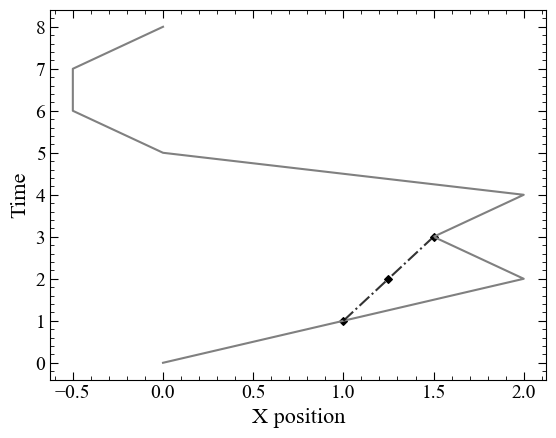

In [38]:
x_position_orig = [0,1,2,1.5,2,0,-0.5,-0.5,0]
x_position_new = [1,1.25,1.5]
time = [0,1,2,3,4,5,6,7,8]
time_change = [1,2,3]

pc_savepath_delta_S = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\delta_S.svg"
laptop_savepath_delta_S = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\delta_S.svg"
plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.plot(x_position_orig, time, label = "original", color = 'grey')
plt.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "black", alpha = 0.8)
plt.scatter(x_position_new, time_change, color = "black", s = 15, marker = "D")

plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(pc_savepath_delta_S, bbox_inches='tight')
plt.show()

# Brownian Bridge Plot

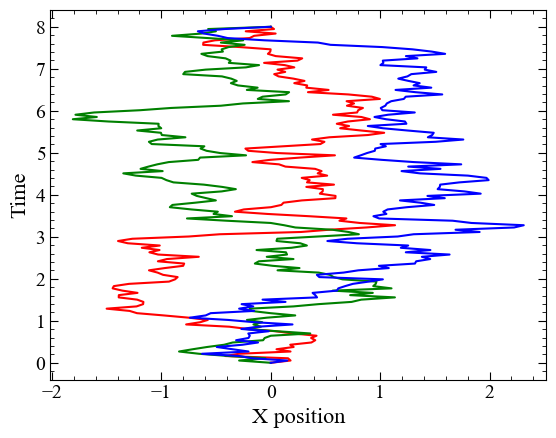

In [39]:
pc_savepath_bridge = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\bridge.svg"
laptop_savepath_bridge = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\bridge.svg"

colors = ['red', 'green', 'blue']

plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

for i in range (3):
    plt.plot(paths_orig[i+20], times, colors[i])


plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(pc_savepath_bridge, bbox_inches='tight')
plt.show()

# Combined Bridge and action plot

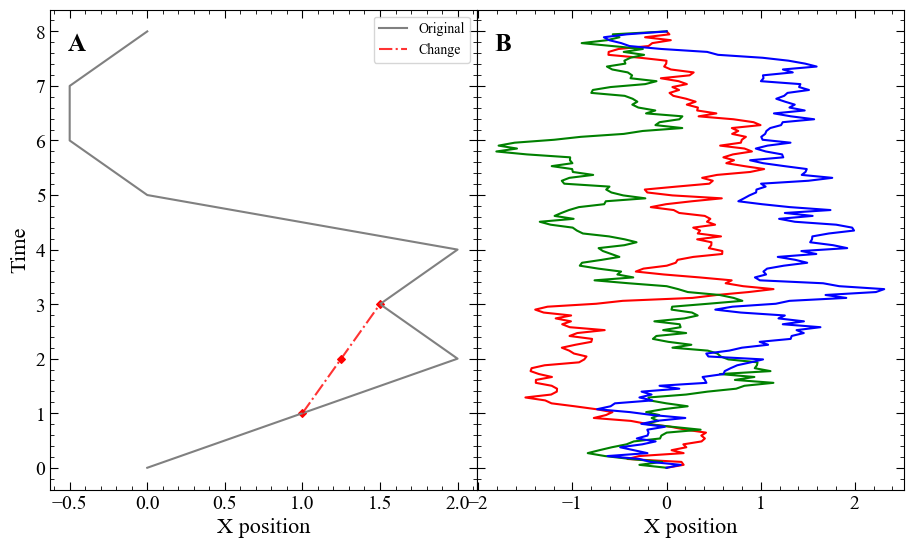

In [40]:
# Combined Plot
pc_savepath_combined = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\combined.svg"
laptop_savepath_combined = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\combined.svg"

fig = plt.figure(1)

# Bridge Plot
ax1 = fig.add_axes([0,0,2/3,1]) #left bottom width height

ax1.minorticks_on()
ax1.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
ax1.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

ax1.set_ylabel('Time')
ax1.set_xlabel('X position')

ax1.plot(x_position_orig, time, label = "Original", color = 'grey')
ax1.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "red", alpha = 0.8)
ax1.scatter(x_position_new, time_change, color = "red", s = 15, marker = "D")
ax1.legend()


ax1.text(
    0.04, 0.95, 'A',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

#Action Plot
f2 = fig.add_axes([2/3,0,2/3,1])

f2.minorticks_on()
f2.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
f2.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

f2.set_yticklabels([])
f2.set_xlabel('X position')

for i in range(3):
    f2.plot(paths_orig[i+20], times, colors[i])

f2.text(
    1.04, 0.95, 'B',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

plt.savefig(pc_savepath_combined, bbox_inches='tight')

plt.show()